In [1]:
# Library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df = df.drop(columns = ['Unnamed: 0']) # Do not rerun
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [5]:
df.shape

(103904, 24)

In [6]:
# Filling in NA values for Arrival Delay in Minutes with mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [7]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## EDA

In [8]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [9]:
# Getting dummies of object columns with 2 options
df = pd.get_dummies(df,columns = ['Gender','Customer Type','Type of Travel'], dtype = int)

In [10]:
# Converting Class to numbers
df['Class'] = df['Class'].map({'Business':0,'Eco':1,'Eco Plus':2})

In [11]:
# Converting satisfaction to numbers
df['satisfaction'] = df['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})

In [12]:
df.dtypes # All columns are now numbers we can analyze.

id                                     int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                           int64
Gender_Female                          int64
Gender_Mal

In [13]:
# Baseline predictive model
df['satisfaction'].mean()

0.43333269171542965

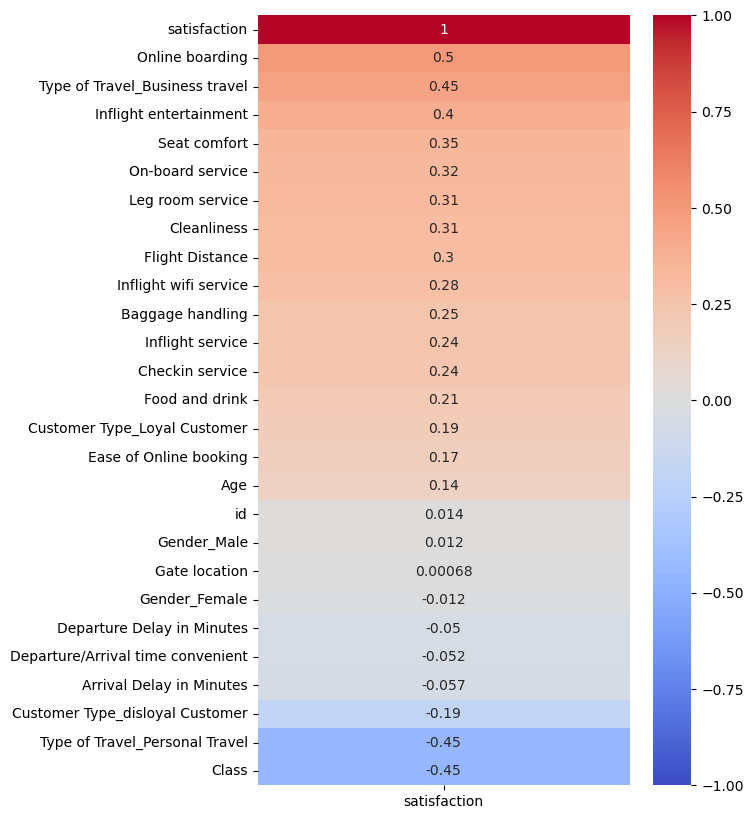

In [14]:
#Heatmap for neutral or dissastified customers
plt.figure(figsize = (6,10))
sns.heatmap(df.corr()[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1
           );

In [15]:
# Features for our Linear Regression predictive model for satisfied customers
features = ['Online boarding','Type of Travel_Business travel','Inflight entertainment','Seat comfort','On-board service','Leg room service','Cleanliness','Flight Distance',
           'Checkin service','Food and drink','Class','Type of Travel_Personal Travel','Customer Type_disloyal Customer','Baggage handling','Inflight wifi service','Inflight service',
           'Customer Type_Loyal Customer']
X = df[features]
y = df['satisfaction']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
# Training Score
lr.score(X_train, y_train)

0.5387538159023062

In [19]:
# Testing Score
lr.score(X_test, y_test)

0.5396615315196289

In [20]:
# KNN predictive model

In [21]:
sc = StandardScaler()
knn = KNeighborsClassifier()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [23]:
# Training Score
knn.score(X_train_sc, y_train)

0.9485679088389283

In [24]:
# Testing Score
knn.score(X_test_sc, y_test)

0.9297043424699722

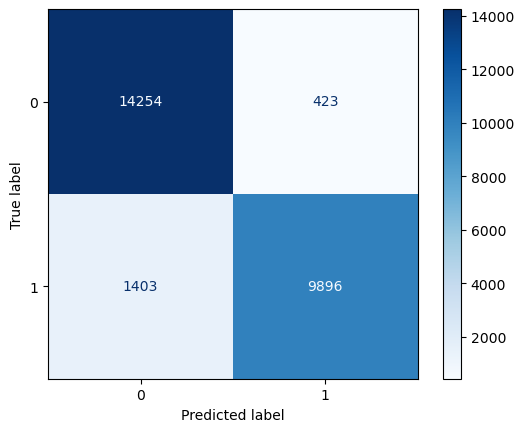

In [25]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [26]:
# What K value is best?
scores = []
for k in range(1,32,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    training_acc = knn.score(X_train_sc, y_train)
    testing_acc = knn.score(X_test_sc, y_test)
    scores.append({'k': k,'Training Accuracy':training_acc,'Testing Accuracy':testing_acc})
df_score = pd.DataFrame(scores)
df_score

,k,Training Accuracy,Testing Accuracy
0,1,0.999949,0.918887
1,3,0.959116,0.927664
2,5,0.948568,0.929704
3,7,0.943011,0.930166
4,9,0.939457,0.928511
5,11,0.937866,0.928357
6,13,0.935299,0.927818
7,15,0.934298,0.927125
8,17,0.933220,0.926663
9,19,0.932566,0.925778


/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattnitkowski/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

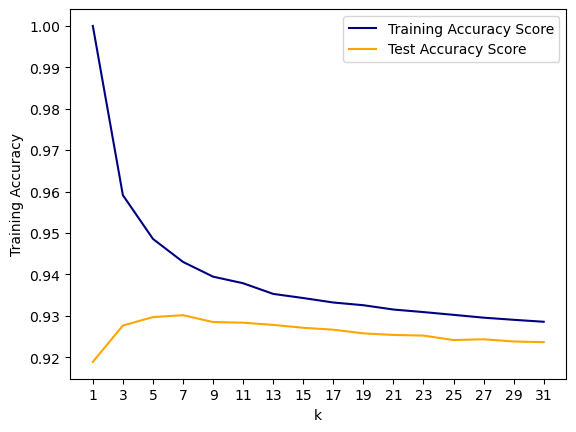

In [27]:
sns.lineplot(data = df_score,
             x = 'k',
             y = 'Training Accuracy',
             c = 'navy',
             label = 'Training Accuracy Score'
            )

sns.lineplot(data = df_score,
             x = 'k',
             y = 'Testing Accuracy',
             c = 'orange',
             label = 'Test Accuracy Score'
            )
plt.xticks(range(1,32,2));

In [28]:
# 7 is the best test accuracy score. We will have an option on Streamlit to pick which k you want.

In [29]:
# Logistic Regression
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [30]:
# Training Score
logr.score(X_train_sc, y_train)

0.8718175751976183

In [31]:
# Testing Score
logr.score(X_test_sc, y_test)

0.8726131813982138

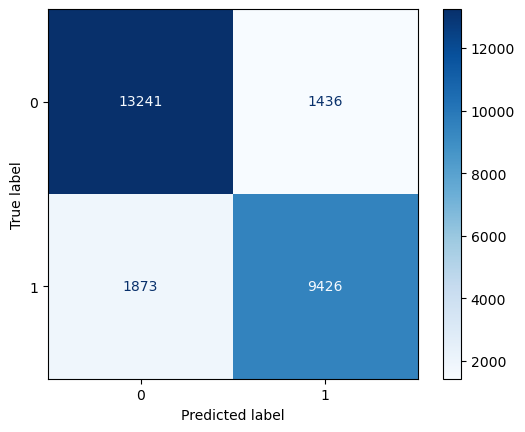

In [33]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Blues');

In [34]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train_sc,y_train)

RandomForestClassifier()

In [35]:
# Training Score
rf.score(X_train_sc, y_train)

0.9999486705677035

In [36]:
# Testing Score
rf.score(X_test_sc, y_test)

0.9586926393594087

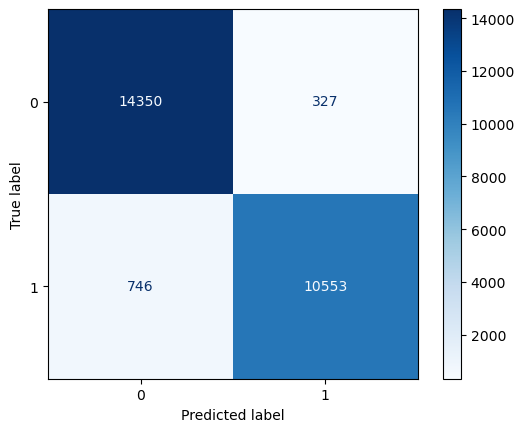

In [38]:
ConfusionMatrixDisplay.from_estimator(rf,X_test_sc,y_test,cmap = 'Blues');

In [42]:
# Saving new dataframe
df5 = df
df5.to_csv('data/new_train.csv', index = False)

In [41]:
df.head()

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,70172,13,2,460,3,4,3,1,5,3,...,5,25,18.0,0,0,1,1,0,0,1
1,5047,25,0,235,3,2,3,3,1,3,...,1,1,6.0,0,0,1,0,1,1,0
2,110028,26,0,1142,2,2,2,2,5,5,...,5,0,0.0,1,1,0,1,0,1,0
3,24026,25,0,562,2,5,5,5,2,2,...,2,11,9.0,0,1,0,1,0,1,0
4,119299,61,0,214,3,3,3,3,4,5,...,3,0,0.0,1,0,1,1,0,1,0


In [ ]:
df.corr()